 ## Import Libarary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np 
import seaborn as sns

## Load data

In [2]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [3]:
train = reduce_mem_usage(pd.read_csv('train.csv'))
#test = reduce_mem_usage(pd.read_csv('test.csv'))
ext_song = reduce_mem_usage(pd.read_csv('song_extra_info.csv'))
members = (pd.read_csv('members.csv',parse_dates=['registration_init_time','expiration_date']))
songs = reduce_mem_usage(pd.read_csv('songs.csv'))

Memory usage of dataframe is 337.71 MB
Memory usage after optimization is: 84.59 MB
Decreased by 75.0%
Memory usage of dataframe is 52.55 MB
Memory usage after optimization is: 266.50 MB
Decreased by -407.1%
Memory usage of dataframe is 122.64 MB
Memory usage after optimization is: 180.18 MB
Decreased by -46.9%


## 3. visualize data

In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  category
song_id               category
source_system_tab     category
source_screen_name    category
source_type           category
target                int8
dtypes: category(5), int8(1)
memory usage: 84.6 MB


In [ ]:
#test.head()

In [ ]:
#test.info()

In [6]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        category
song_length    int32
genre_ids      category
artist_name    category
composer       category
lyricist       category
language       float16
dtypes: category(5), float16(1), int32(1)
memory usage: 180.2 MB


In [8]:
ext_song.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [9]:
ext_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
song_id    category
name       category
isrc       category
dtypes: category(3)
memory usage: 266.5 MB


In [10]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [11]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null datetime64[ns]
expiration_date           34403 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.8+ MB


## 3. EDA

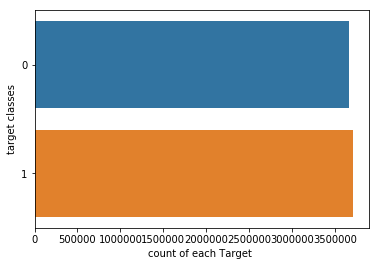

In [12]:
sns.countplot(y=train['target'],data=train)
plt.ylabel('target classes')
plt.xlabel('count of each Target ')
plt.show()

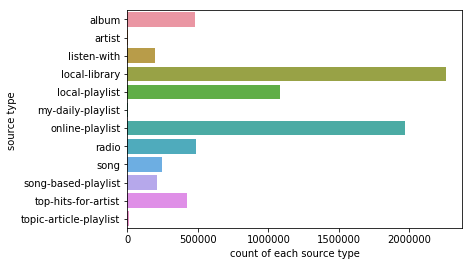

In [13]:
sns.countplot(y=train['source_type'],data=train)
plt.ylabel('source type ')
plt.xlabel('count of each source type')
plt.show()

In [14]:
#mising values
def miss_val(df):
    for col in df.columns:
        nan_count=df[col].isnull().sum()
        total= df.shape[0]
        pp= (nan_count/ total )* 100
        #print(type(pp))
        print(col,'has' ,pp,'% missing values')

In [15]:
print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.3368251602389888 % missing values
source_screen_name has 5.622617560778039 % missing values
source_type has 0.2919585144829804 % missing values
target has 0.0 % missing values


In [16]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
gender has 57.84960613899951 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


In [17]:
print('Song data')
miss_val(songs)

Song data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 4.0985576923076925 % missing values
artist_name has 0.0 % missing values
composer has 46.65525710702341 % missing values
lyricist has 84.71240942028986 % missing values
language has 4.35479375696767e-05 % missing values


In [18]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 8.710911418306241e-05 % missing values
isrc has 5.9472876617344035 % missing values


## handling missing values

In [19]:
train['source_system_tab'].value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [20]:
#replace with my library 
train['source_system_tab'].fillna('my library',inplace=True)

In [21]:
train['source_type'].value_counts()


local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

In [22]:
#replace with local-library 
train['source_type'].fillna('local-library',inplace=True)

In [23]:
train['source_screen_name'].value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [25]:
print('Taning data')
miss_val(train)

Taning data
msno has 0.0 % missing values
song_id has 0.0 % missing values
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values


### member data  

In [26]:
members.drop(['gender'], axis =1, inplace=True)

In [27]:
print('members  data')
miss_val(members)

members  data
msno has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
registration_init_time has 0.0 % missing values
expiration_date has 0.0 % missing values


### songs data  

In [28]:
songs.drop(['composer'], axis =1, inplace=True)
songs.drop(['lyricist'], axis =1, inplace=True)


In [29]:
songs['genre_ids'].value_counts()

465                      567911
958                      176349
2022                     168870
1609                     166457
2122                     139938
1259                     101485
921                       67578
1152                      48730
359                       43601
786                       42999
726                       34969
139                       34876
1011                      34013
940                       33490
1572|275                  24338
1955                      20980
691                       19472
139|125|109               17613
873                       17542
437                       17212
947                       17106
388                       16776
458                       15438
444                       14859
1616                      14188
242                       13756
451                       13283
880                       13059
423                       11814
829                       11759
                          ...  
465|275 

In [30]:
#replace with 465 
songs['genre_ids'].fillna('465',inplace=True)

In [31]:
songs['language'].value_counts()

 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: language, dtype: int64

In [32]:
#replace with 465 
songs['language'].fillna(52.0,inplace=True)

In [33]:
print('songs.info data')
miss_val(songs)

songs.info data
song_id has 0.0 % missing values
song_length has 0.0 % missing values
genre_ids has 0.0 % missing values
artist_name has 0.0 % missing values
language has 0.0 % missing values


### songs exta info data  

In [34]:
ext_song['name'].value_counts()

Intro                                                      1734
Silent Night                                               1088
White Christmas                                            1018
Jingle Bells                                                964
Ave Maria                                                   792
Summertime                                                  762
Amazing Grace                                               724
1. Allegro                                                  688
Home                                                        677
Winter Wonderland                                           596
Moon River                                                  576
Time                                                        557
Autumn Leaves                                               556
The First Noel                                              512
O Holy Night                                                507
Stay                                    

In [35]:
#replace with Into 
ext_song['name'].fillna('Intro',inplace=True)


In [36]:
ext_song['isrc'].value_counts()

GBPS81518952    207
GBPS81527416    205
GBPS81518680    195
GBPS81518950    195
GBPS81518682    194
GBPS81527413    193
GBPS81527817    189
GBPS81527820    186
GBPS81527823    184
GBPS81518948    183
GBPS81518947    174
GBPS81518943    174
GBPS81527417    173
GBPS81518945    172
GBPS81527822    170
US6R21419985    167
GBPS81518944    154
GBPS81400018    145
GBPS81518681    132
GBPS81529212    131
GBPS81529178    129
GBPS81528923    129
GBPS81529179    128
GBPS81529213    127
USV351456233    127
GBPS81527818    126
GBPS81529089    126
USV291427155    126
GBPS81528967    126
GBPS81528929    126
               ... 
TCACS1643100      1
TCACS1643101      1
TCACS1643102      1
TCACS1642264      1
TCACS1642245      1
TCACS1641638      1
TCACS1641918      1
TCACS1641790      1
TCACS1641814      1
TCACS1641849      1
TCACS1641854      1
TCACS1641857      1
TCACS1641858      1
TCACS1641870      1
TCACS1641907      1
TCACS1641910      1
TCACS1641915      1
TCACS1641923      1
TCACS1642199      1


In [37]:
#replace with Into 
ext_song['isrc'].fillna('GBPS81518952',inplace=True)

In [38]:
print('ext_song.info data')
miss_val(ext_song)

ext_song.info data
song_id has 0.0 % missing values
name has 0.0 % missing values
isrc has 0.0 % missing values


### merging data

In [39]:
#meging data
songs_all= pd.merge(songs,ext_song,
                     on ='song_id' ,how='left')
train_memebrs= pd.merge(train,members,
                    on ='msno' ,how='left')
train_data= pd.merge(train_memebrs,songs_all,
                     on ='song_id' ,how='left')


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 17 columns):
msno                      object
song_id                   object
source_system_tab         category
source_screen_name        category
source_type               category
target                    int8
city                      int64
bd                        int64
registered_via            int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
song_length               float64
genre_ids                 category
artist_name               category
language                  float16
name                      category
isrc                      category
dtypes: category(7), datetime64[ns](2), float16(1), float64(1), int64(3), int8(1), object(2)
memory usage: 801.7+ MB


In [41]:
train_data.drop(['msno'], axis =1, inplace=True)
train_data.drop(['song_id'], axis =1, inplace=True)
train_data.drop(['isrc'], axis =1, inplace=True)
train_data.drop(['artist_name'], axis =1, inplace=True)
train_data.drop(['genre_ids'], axis =1, inplace=True)
train_data.drop(['name'], axis =1, inplace=True)


In [42]:
train_data['membership_days'] = train_data['expiration_date'].subtract(train_data['registration_init_time']).dt.days.astype(int)
train_data['registration_year'] = train_data['registration_init_time'].dt.year
train_data['expiration_year'] = train_data['expiration_date'].dt.year
train_data.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)
train_data.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
0,explore,Explore,online-playlist,1,1,0,7,206471.0,52.0,2103,2012,2017
1,my library,Local playlist more,local-playlist,1,13,24,9,284584.0,52.0,2301,2011,2017
2,my library,Local playlist more,local-playlist,1,13,24,9,225396.0,52.0,2301,2011,2017
3,my library,Local playlist more,local-playlist,1,13,24,9,255512.0,-1.0,2301,2011,2017
4,explore,Explore,online-playlist,1,1,0,7,187802.0,52.0,2103,2012,2017


In [43]:
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type']

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
for f in label_encoding:
    lb = LabelEncoder()
    lb.fit(list(train_data[f].values) )
    train_data[f] = lb.transform(list(train_data[f].values))
   

In [46]:
for col in train_data.columns:
    if train_data[col].dtype == object:
        train_data[col] = train_data[col].astype('category')
        

In [47]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0015452560773972681 % missing values
language has 0.0015452560773972681 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [48]:
train_data['song_length'].value_counts()

235415.0    18749
258298.0    18440
219324.0    17756
250357.0    17740
265508.0    16452
258403.0    15993
261224.0    14926
245446.0    14604
215144.0    13881
234893.0    13582
287328.0    13045
266448.0    12986
251611.0    12717
290063.0    12396
185295.0    12144
227343.0    12074
271255.0    12029
259030.0    12012
212750.0    11785
265848.0    11769
283846.0    11322
261328.0    11175
281495.0    11169
346272.0    11131
272822.0    10878
264150.0    10709
275017.0    10615
244976.0    10386
231549.0    10370
236460.0    10311
            ...  
321712.0        1
321728.0        1
321736.0        1
321759.0        1
321055.0        1
321028.0        1
319921.0        1
320976.0        1
319941.0        1
319948.0        1
319958.0        1
320038.0        1
320081.0        1
320131.0        1
320191.0        1
320226.0        1
320272.0        1
320401.0        1
320402.0        1
320479.0        1
320482.0        1
320492.0        1
320609.0        1
320640.0        1
320688.0  

In [49]:
#replace with Into 
train_data['song_length'].fillna(235415.0 ,inplace=True)

In [50]:
train_data['language'].value_counts()

 3.0     4044643
 52.0    1864825
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64

In [51]:

train_data['language'].fillna(3.0 ,inplace=True)

In [52]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


In [53]:
train_data.replace([np.inf,-np.inf],np.nan, inplace =True)

In [54]:
print('train data')
miss_val(train_data)

train data
source_system_tab has 0.0 % missing values
source_screen_name has 0.0 % missing values
source_type has 0.0 % missing values
target has 0.0 % missing values
city has 0.0 % missing values
bd has 0.0 % missing values
registered_via has 0.0 % missing values
song_length has 0.0 % missing values
language has 0.0 % missing values
membership_days has 0.0 % missing values
registration_year has 0.0 % missing values
expiration_year has 0.0 % missing values


## 4. Model Bilding

In [55]:
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
train_data.shape

(7377418, 12)

In [72]:
train_data = train_data.sample(frac = 1)

In [73]:
train_data1=train_data[0:30000]

In [74]:
train_data1.shape

(30000, 12)

In [76]:
train_data1.head()

,source_system_tab,source_screen_name,source_type,target,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
1762455,3,8,3,0,13,33,4,283898.0,3.0,126,2016,2017
1498919,5,14,7,0,1,0,7,234753.0,3.0,1131,2014,2017
5219988,6,11,6,0,1,0,4,244532.0,3.0,3,2017,2017
598100,0,15,8,1,1,0,7,295444.0,3.0,1706,2013,2017
2638769,3,19,4,1,5,28,9,236460.0,3.0,4075,2006,2017


In [77]:
x = train_data1.drop(['target'], axis =1)
y = train_data1['target']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [79]:

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 50441 to 6043772
Data columns (total 11 columns):
source_system_tab     21000 non-null int64
source_screen_name    21000 non-null int64
source_type           21000 non-null int64
city                  21000 non-null int64
bd                    21000 non-null int64
registered_via        21000 non-null int64
song_length           21000 non-null float64
language              21000 non-null float16
membership_days       21000 non-null int64
registration_year     21000 non-null int64
expiration_year       21000 non-null int64
dtypes: float16(1), float64(1), int64(9)
memory usage: 1.8 MB


In [80]:
x_train.describe()

,source_system_tab,source_screen_name,source_type,city,bd,registered_via,song_length,language,membership_days,registration_year,expiration_year
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,2.100000e+04,21000.000000,21000.000000,21000.000000
mean,2.410952,9.017286,4.720667,7.435381,17.381952,6.795286,2.449057e+05,inf,1618.879905,2012.765190,2017.071048
std,1.868319,4.511335,2.443450,6.635519,21.589724,2.271040,6.436421e+04,2.117188e+01,1126.850854,3.011709,0.409888
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.058800e+04,-1.000000e+00,0.000000,2004.000000,2004.000000
25%,0.000000,8.000000,3.000000,1.000000,0.000000,4.000000,2.147260e+05,3.000000e+00,700.000000,2011.000000,2017.000000
50%,3.000000,8.000000,4.000000,5.000000,21.000000,7.000000,2.422070e+05,3.000000e+00,1421.000000,2013.000000,2017.000000
75%,3.000000,11.000000,6.000000,13.000000,28.000000,9.000000,2.717770e+05,5.200000e+01,2284.000000,2015.000000,2017.000000
max,7.000000,19.000000,11.000000,22.000000,1030.000000,13.000000,3.600300e+06,5.900000e+01,5149.000000,2017.000000,2020.000000


In [81]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [82]:
np.isnan(x_test.any())

False

In [83]:
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [84]:
y_pp=clf.predict(x_test)
print ("Test - Accuracy :", accuracy_score(y_test, y_pp))
print ("Test -  Confusion matrix :\n",confusion_matrix(y_test, y_pp))

Test - Accuracy : 0.5936666666666667
Test -  Confusion matrix :
 [[2416 2115]
 [1542 2927]]
